In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
providence_df = pd.read_csv('../Data/Clean/providence.csv')

In [3]:
providence_df.head()


,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,52.0,44.0,59.0,14886.916910,0.135527,357332.586667,75.0,1335.0,294646.210320,3.482,4.033,0.550
1,2018-02,53.0,45.0,49.0,13721.127660,0.122285,383405.906250,64.0,1087.0,295883.910233,3.785,4.330,0.545
2,2018-03,58.0,43.0,46.0,17894.740573,0.118579,372595.388889,90.0,1419.0,297498.840973,3.910,4.444,0.534
3,2018-04,61.0,41.0,41.0,18644.291850,0.142316,390282.752688,93.0,1565.0,299255.564948,3.925,4.468,0.543
4,2018-05,61.0,42.0,33.0,15307.745888,0.163512,409967.413548,93.0,1995.0,301115.602682,4.066,4.586,0.520


In [4]:
# Check for missing values 
print(providence_df.isnull().sum())

DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceCutPct           0
NewConstructMeanSalePrice    0
NewConstructSalesCount       0
SalesCount                   0
SalePrice                    0
MORTGAGE15US                 0
MORTGAGE30US                 0
RATE_DIFFERENCE              0
dtype: int64


In [5]:
providence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       78 non-null     object 
 1   MarketTempIdx              78 non-null     float64
 2   DaysToClose                78 non-null     float64
 3   DaysOnZillow               78 non-null     float64
 4   ListingPriceCutAmt         78 non-null     float64
 5   ListingPriceCutPct         78 non-null     float64
 6   NewConstructMeanSalePrice  78 non-null     float64
 7   NewConstructSalesCount     78 non-null     float64
 8   SalesCount                 78 non-null     float64
 9   SalePrice                  78 non-null     float64
 10  MORTGAGE15US               78 non-null     float64
 11  MORTGAGE30US               78 non-null     float64
 12  RATE_DIFFERENCE            78 non-null     float64
dtypes: float64(12), object(1)
memory usage: 8.1+ KB


In [6]:
# Check the shape of providence DataFrame (rows, columns)
print(providence_df.shape)

(78, 13)


In [7]:
# Round the specified columns to 0 decimals
providence_df['ListingPriceCutAmt'] = providence_df['ListingPriceCutAmt'].round(0)
providence_df['NewConstructMeanSalePrice'] = providence_df['NewConstructMeanSalePrice'].round(0)
providence_df['SalePrice'] = providence_df['SalePrice'].round(0)
providence_df.head()

,DATE,MarketTempIdx,DaysToClose,DaysOnZillow,ListingPriceCutAmt,ListingPriceCutPct,NewConstructMeanSalePrice,NewConstructSalesCount,SalesCount,SalePrice,MORTGAGE15US,MORTGAGE30US,RATE_DIFFERENCE
0,2018-01,52.0,44.0,59.0,14887.0,0.135527,357333.0,75.0,1335.0,294646.0,3.482,4.033,0.550
1,2018-02,53.0,45.0,49.0,13721.0,0.122285,383406.0,64.0,1087.0,295884.0,3.785,4.330,0.545
2,2018-03,58.0,43.0,46.0,17895.0,0.118579,372595.0,90.0,1419.0,297499.0,3.910,4.444,0.534
3,2018-04,61.0,41.0,41.0,18644.0,0.142316,390283.0,93.0,1565.0,299256.0,3.925,4.468,0.543
4,2018-05,61.0,42.0,33.0,15308.0,0.163512,409967.0,93.0,1995.0,301116.0,4.066,4.586,0.520


In [8]:
#Linear Regression for providence
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#Split providence Data into training and test set
X = providence_df[['DaysToClose', 'DaysOnZillow', 'ListingPriceCutAmt', 'ListingPriceCutPct', 'NewConstructMeanSalePrice', 'NewConstructSalesCount', 'SalesCount', 'MORTGAGE15US', 'MORTGAGE30US', 'RATE_DIFFERENCE']]
y = providence_df['SalePrice']

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Linear Regression model
model = LinearRegression()

In [12]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Evaluate the model
y_pred = model.predict(X_test)

In [14]:
y_pred

array([331139.80318643, 298855.33515012, 328091.56590441, 315269.09469715,
       325799.34188164, 471473.77964133, 327465.91606312, 317770.40237448,
       436934.97993463, 477795.18466251, 457441.519586  , 308985.77505913,
       492205.16192775, 430578.41113189, 310589.28473505, 381376.3986805 ])

In [15]:
#y_pred_rounded = np.round(y_pred,0)

In [16]:
# Calculate evaluation metrics
linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {linear_mse}")
print(f"R-Squared Score: {linear_r2}")

Mean Squared Error: 256059045.3094569
R-Squared Score: 0.9413461859060497


In [17]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor()

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [20]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
rf_y_pred = rf_model.predict(X_test)

In [22]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared Score: {rf_r2}")

Mean Squared Error: 256059045.3094569
R-squared Score: 0.9413461859060497


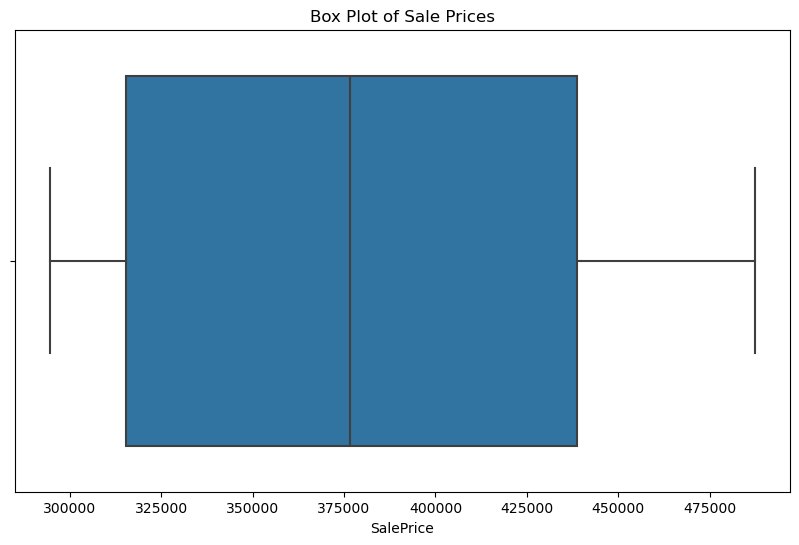

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'SalePrice' is your target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=providence_df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.show()

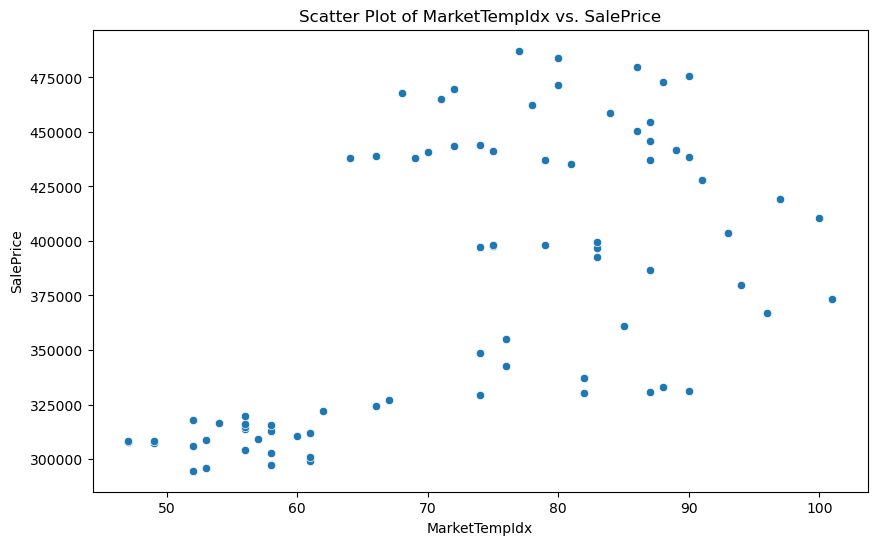

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=providence_df['MarketTempIdx'], y=providence_df['SalePrice'])
plt.title('Scatter Plot of MarketTempIdx vs. SalePrice')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


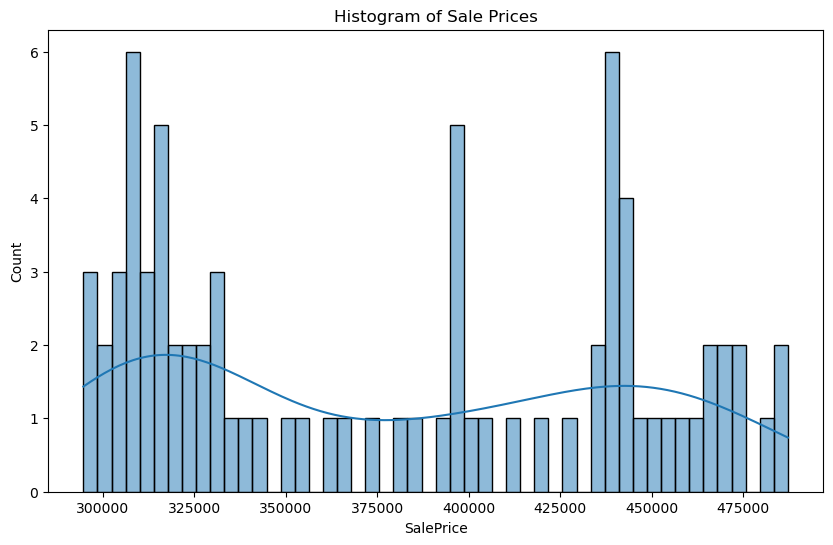

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(providence_df['SalePrice'], bins=50, kde=True)
plt.title('Histogram of Sale Prices')
plt.show()